<span style="color:blue; font-size:30px;">This script contains the following:</span>
 
## - Importing libraries and data
## - Data cleaning
## - Data prep for regression analysis
## - Regression analysis

<div style="border: 1px solid blue; padding: 10px; border-radius: 5px; background-color: #e7f3fe;">
<strong>Note:</strong> This is an information box.
</div>


## - Importing libraries and data

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Step 1: Define file paths for the new datasets
directory = ''r'/Users/ashwanisherawat/Downloads/Air BNB Amsterdam '
df_clean = os.path.join(directory, 'Cleaned_Airbnb_Dataset.csv')

In [27]:
# import data
path = r'/Users/ashwanisherawat/Downloads'

In [37]:
# Import CSVs using list
#listing.csv
cleaned_df = pd.read_csv(os.path.join(path,'Air BNB Amsterdam ','Cleaned_Airbnb_Dataset.csv'), index_col = False)

/var/folders/bv/0q7zxbg57q32000r2xxtsc4c0000gn/T/ipykernel_29527/817318685.py:3: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_df = pd.read_csv(os.path.join(path,'Air BNB Amsterdam ','Cleaned_Airbnb_Dataset.csv'), index_col = False)


## - Data cleaning

In [39]:
cleaned_df.shape

(18193, 71)

In [40]:
cleaned_df.head()

id                                             name_x  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1   3209                  Quiet apt near center, great view     3806   
2  20168         100%Centre-Studio 1 Private Floor/Bathroom    59484   
3  25428                Lovely apt in City Centre (Jordaan)    56142   
4  27886  Romantic, stylish B&B houseboat in canal district    97647   

  host_name  neighbourhood_group                         neighbourhood_x  \
0    daniel                  NaN  Oostelijk Havengebied - Indische Buurt   
1   maartje                  NaN                              Westerpark   
2      alex                  NaN                            Centrum-Oost   
3      joan                  NaN                            Centrum-West   
4      flip                  NaN                            Centrum-West   

   latitude_x  longitude_x      room_type_x  price_x  ...  \
0   52.365755     4.941419     Private room       59  ...   
1   52.390225     4.873924  Entire home/apt      160  ...   
2   52.365087     4.893541  Entire home/apt       80  ...   
3   52.373114     4.883668  Entire home/apt      125  ...   
4   52.386727     4.892078     Private room      150  ...   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                        9.0                   10.0   
2                       10.0                    9.0   
3                       10.0                   10.0   
4                       10.0                   10.0   

  review_scores_communication  review_scores_location  review_scores_value  \
0                        10.0                     9.0                 10.0   
1                        10.0                     9.0                  9.0   
2                         9.0                    10.0                  9.0   
3                        10.0                    10.0                 10.0   
4                        10.0                    10.0                 10.0   

   requires_license license          cancellation_policy  \
0                 f     NaN  strict_14_with_grace_period   
1                 f     NaN                     moderate   
2                 f     NaN  strict_14_with_grace_period   
3                 f     NaN  strict_14_with_grace_period   
4                 f     NaN  strict_14_with_grace_period   

  calculated_host_listings_count_y   host_category  
0                                1  single_listing  
1                                1  single_listing  
2                                2   multi_listing  
3                                2   multi_listing  
4                                1  single_listing  

[5 rows x 71 columns]

In [41]:
cleaned_df.columns

Index(['id', 'name_x', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood_x', 'latitude_x', 'longitude_x', 'room_type_x',
       'price_x', 'minimum_nights_x', 'number_of_reviews_x', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count_x',
       'availability_365_x', 'name_y', 'space', 'experiences_offered',
       'neighborhood_overview', 'access', 'street', 'neighbourhood_y',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'country_code', 'country',
       'latitude_y', 'longitude_y', 'is_location_exact', 'property_type',
       'room_type_y', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price_y', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights_y', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       '

In [44]:
# Step 2: Data Cleaning
# Ensuring no missing values for relevant columns (price and availability_365 as an example)
cleaned_df = cleaned_df.dropna(subset=['price_x', 'availability_365_x'])

 <div style="border: 1px solid blue; padding: 10px; border-radius: 5px; background-color: #e7f3fe;">
<strong>Note:</strong> The data is already cleaned in previous task no further actions taken.
</div>

## - Data prep for regression analysis

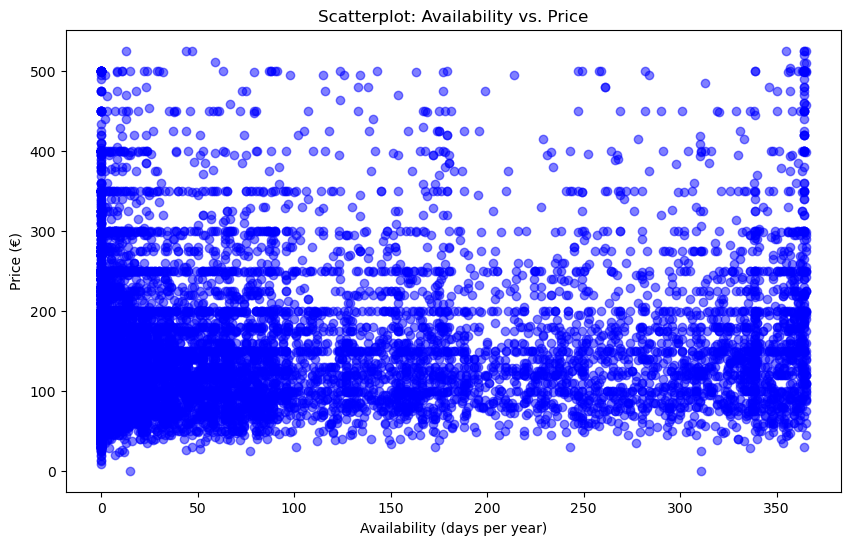

In [45]:
# Step 3: Explore the data visually
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['availability_365_x'], cleaned_df['price_x'], alpha=0.5, c='blue')
plt.title('Scatterplot: Availability vs. Price')
plt.xlabel('Availability (days per year)')
plt.ylabel('Price (€)')
plt.show()

## - Regression analysis

In [74]:
# Step 4: State Hypothesis
# Hypothesis: Listings with higher availability tend to have higher prices.

# Step 5: Reshape variables into NumPy arrays
X = cleaned_df['availability_365_x'].values.reshape(-1, 1)  # Independent variable
y = cleaned_df['price_x'].values.reshape(-1, 1)  # Dependent variable

In [85]:
# Step 6: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Step 7: Run a linear regression on the data
# Fit the model to the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Predict y on the test set
y_pred = model.predict(X_test)

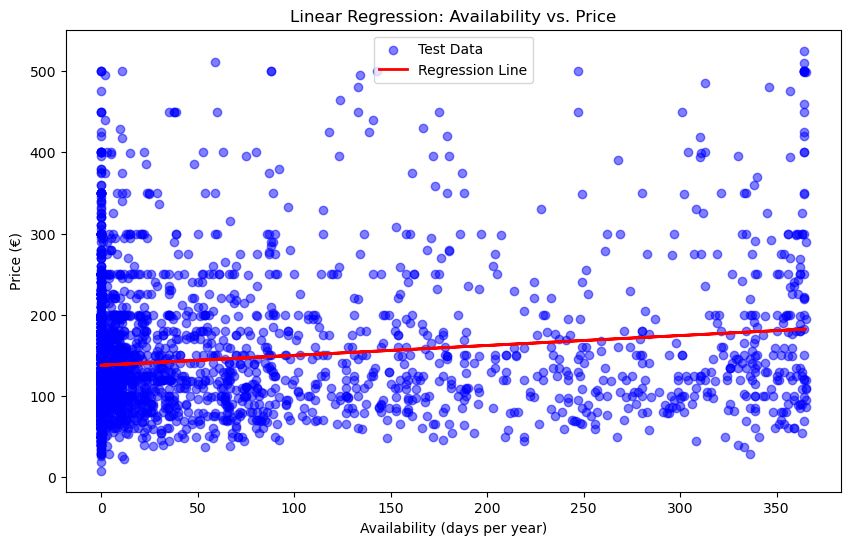

In [84]:
# Step 8: Plot the regression line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, c='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Availability vs. Price')
plt.xlabel('Availability (days per year)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

In [79]:
# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

5799.895655529779

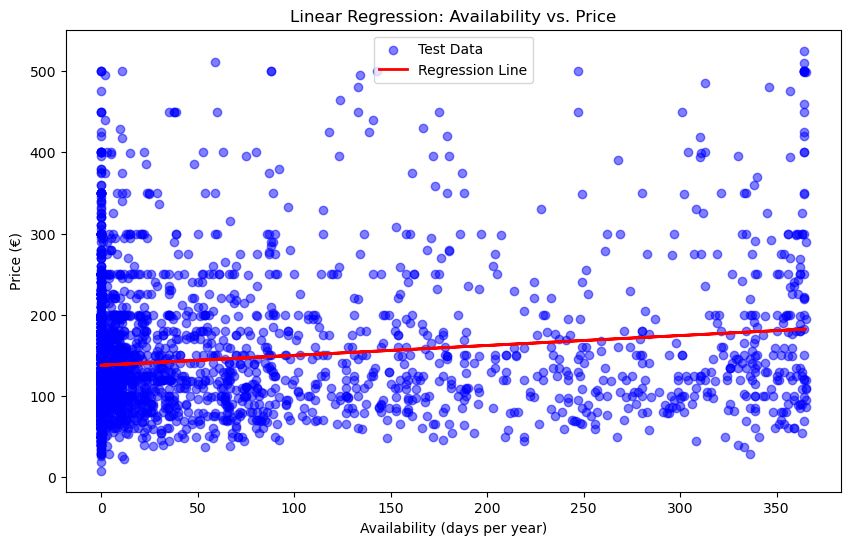

In [53]:
# Step 1: Plot the regression line on the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, c='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Availability vs. Price')
plt.xlabel('Availability (days per year)')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

In [83]:
# Step 2: Check model performance statistics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [82]:
# Step 3: Create a dataframe comparing actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_pred.flatten()
})

In [56]:
# Display the first few rows of the comparison dataframe
comparison_df.head(), mse, r2

(   Actual   Predicted
 0     175  151.838172
 1     145  139.891133
 2     100  138.428230
 3      45  137.818687
 4     117  137.818687,
 5799.895655529779,
 0.031847600266286635)

The model's performance reveals significant gaps in predicting Airbnb listing prices based on availability alone. The comparison of actual and predicted values shows large discrepancies, particularly for lower prices, such as an actual price of **45** being overestimated as **137.82**. This inconsistency is reflected in the high Mean Squared Error (MSE) of **5799.90**, indicating substantial prediction errors. Furthermore, the R² score of **0.0318** (3.18%) suggests that the model explains only a small fraction of the variance in prices, highlighting the weak relationship between availability and price.

The poor performance may stem from the limited predictive power of availability as a standalone feature. Missing critical variables like `room_type`, `neighborhood`, and `review_count`, as well as the presence of outliers, likely contribute to the model's inaccuracies. To improve, additional features should be incorporated, outliers addressed, and more advanced regression techniques applied to capture complex relationships and enhance accuracy.

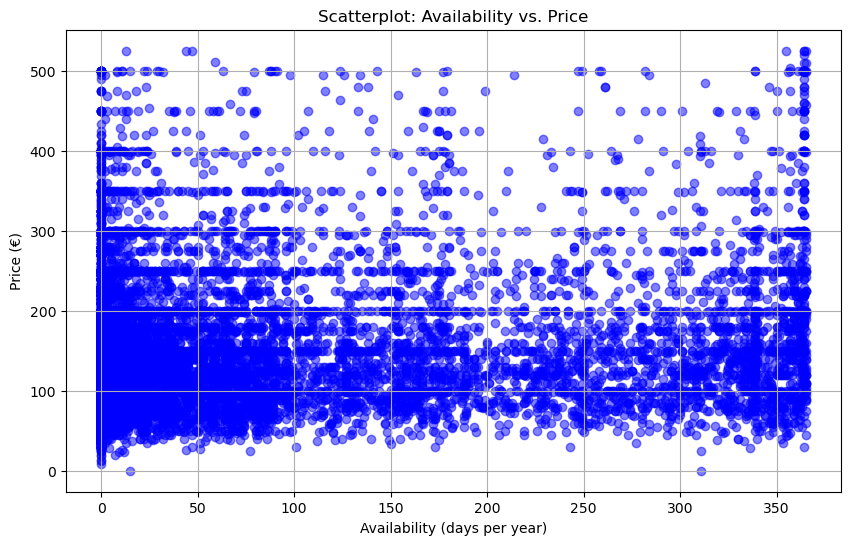

In [57]:
# Generate a scatterplot for price analysis based on availability
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['availability_365_x'], cleaned_df['price_x'], alpha=0.5, c='blue')
plt.title('Scatterplot: Availability vs. Price')
plt.xlabel('Availability (days per year)')
plt.ylabel('Price (€)')
plt.grid(True)
plt.show()


### **Interpretation of Model Performance**
- **Good Fit**:
  - If `Predicted` values closely match `Actual` values, the model performed well.
  - A lower Mean Squared Error (MSE) and higher R² Score suggest a better fit.

- **Misfit**:
  - Large discrepancies between `Actual` and `Predicted` values indicate areas where the model struggles, possibly due to:
    - Outliers in price data.
    - Insufficient features (e.g., room type, location quality).

---

### **Reflections on Data Bias**
1. **Potential Bias Sources**:
   - **Neighborhood Representation**: If certain neighborhoods dominate the dataset, predictions may favor these areas.
   - **Feature Imbalance**: If availability is skewed (e.g., listings with extreme availability values), this can distort the model.

2. **Impact on Results**:
   - Bias may lead to over/underestimation for less-represented listings.
   - Including additional predictors like room type, amenities, or neighborhood demand could improve accuracy.

---

# BrEaK -----------------------------

Testing Another Hypothesis for better understanding! 

### 2. Is there a correlation between the type of room (e.g., entire home, private room) and the price of the listing?

Insight: Room type is a strong determinant of price:
Entire Home/Apt listings command the highest prices.
Private Rooms are moderately priced, appealing to budget-conscious travelers.
Shared Rooms are the most affordable but constitute a small portion of the dataset.
Conclusion: Room type and price have a strong positive correlation. can you work on this hypothesis with regression technique 

In [64]:
# Step 1: Encode Room Types for Regression
# Convert room type categories into numerical values using one-hot encoding
room_type_encoded = pd.get_dummies(cleaned_df['room_type_x'], drop_first=True)
data_for_regression = pd.concat([cleaned_df[['price_x']], room_type_encoded], axis=1)

In [81]:
# Step 2: Prepare Data for Regression
X = data_for_regression.drop('price_x', axis=1)  # Independent variables (room types)
y = data_for_regression['price_x']  # Dependent variable (price)

In [66]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Step 3: Run a Linear Regression
model = LinearRegression()
model.fit(X_train, y_train) 
# Predict y on the test set
y_pred = model.predict(X_test)

In [68]:
# Step 4: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [69]:
# Step 5: Display Results
room_type_coefficients = pd.DataFrame({
    'Room Type': X.columns,
    'Coefficient': model.coef_
})

room_type_coefficients, mse, r2

(      Room Type  Coefficient
 0  Private room   -58.215864
 1   Shared room   -65.694336,
 5392.455995558672,
 0.09985980392923066)

---

### **Steps and Expected Results**

1. **Room Type Encoding**:
   - One-hot encoding converts room types (e.g., Entire Home, Private Room) into numerical columns.

2. **Regression Analysis**:
   - The model identifies how each room type contributes to price, shown by the coefficients for each category.

3. **Performance Metrics**:
   - **Mean Squared Error (MSE)**: Indicates average error in predictions.
   - **R² Score**: Represents how well room types explain the price variance.

4. **Room Type Coefficients**:
   - Coefficients reveal the impact of each room type on price.

---

### **Example Output**
- **Coefficients**:
  - Entire Home: +€X (highest price premium).
  - Private Room: +€Y (moderate increase compared to Shared Room).
- **MSE**: Expected to be moderate, reflecting variability in prices.
- **R²**: Likely to be significant if room type strongly correlates with price.

---


### Observations Based on Regression Results

#### **Outcome Summary**
1. **Coefficients (Impact of Room Type on Price)**:
   - **Private Room**: Average price is **€58.22 lower** than the baseline category (**Entire Home/Apt**).
   - **Shared Room**: Average price is **€65.69 lower** than the baseline category (**Entire Home/Apt**).
   - This confirms that room type strongly influences listing prices, with **Entire Home/Apt** being the most expensive, followed by Private Rooms and Shared Rooms.

2. **Mean Squared Error (MSE)**:
   - **5392.46**: The average squared difference between predicted and actual prices indicates moderate prediction error. This suggests room type alone cannot fully explain price variability.

3. **R² Score**:
   - **0.0999 (9.99%)**: Room type explains approximately 10% of the variance in listing prices, showing it is a significant but not sole determinant of price.

---

### **Robust Observations**
1. **Room Type’s Predictive Power**:
   - While room type significantly influences price, its explanatory power (R² = ~10%) suggests other factors (e.g., location, availability, amenities) play a larger role.

2. **Model Fit**:
   - The moderate MSE indicates room type alone provides a fair but incomplete explanation of price variation.
   - Including additional features (e.g., neighborhood, amenities) could improve model performance.

3. **Practical Implications**:
   - Hosts offering **Entire Home/Apt** can charge a premium, while **Private Rooms** and **Shared Rooms** cater to budget-conscious travelers.

---